In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson, gaussian_kde, norm, chi2_contingency, ks_2samp
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
np.float = float    
np.int = int   #module 'numpy' has no attribute 'int'
np.object = object    #module 'numpy' has no attribute 'object'
np.bool = bool    #module 'numpy' has no attribute 'bool'
from sklearn.mixture import GaussianMixture


# Step 1: Load the data from CSV
df = pd.read_csv('casestudydata.csv')

c:\Users\beatr\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


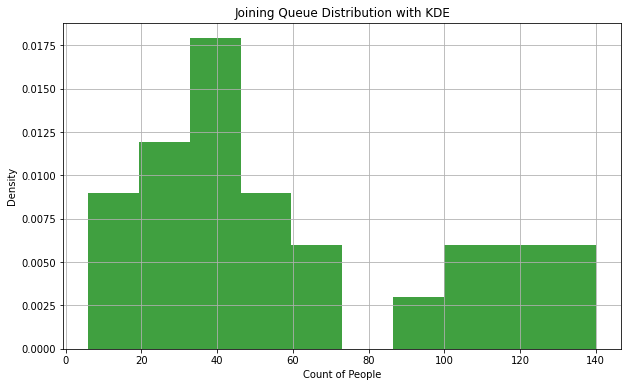

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Joining Queue'], bins=10,  color='green', stat='density', linewidth=0)
plt.xlabel('Count of People')
plt.ylabel('Density')
plt.title('Joining Queue Distribution with KDE')
plt.grid(True)
plt.show()

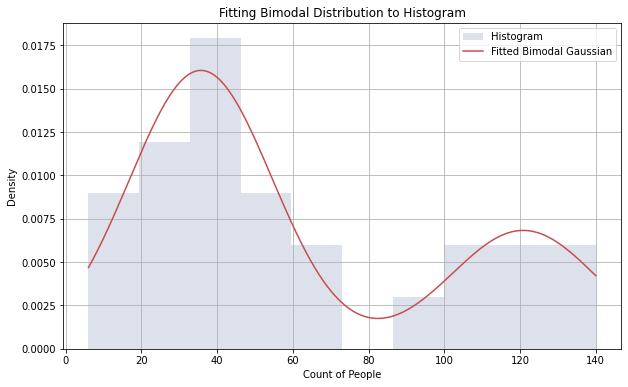

In [3]:
data = df['Joining Queue'].values.reshape(-1, 1)
plt.figure(figsize=(10, 6))
# Step 1: Plot the histogram
hist_values, bin_edges, _ = plt.hist(data, bins=10, density=True, alpha=0.5, color='#bbc5da', label='Histogram')

# Step 2: Initial guess for parameters (means, std deviations, weights)
initial_guess = [36.56, 17.96, 0.7, 119.08, 14.99, 0.3]

# Step 3: Define a bimodal Gaussian function
def bimodal_gaussian(x, mean1, std_dev1, weight1, mean2, std_dev2, weight2):
    return (weight1 * np.exp(-0.5 * ((x - mean1) / std_dev1)**2) + 
            weight2 * np.exp(-0.5 * ((x - mean2) / std_dev2)**2))


# # Compute bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Step 4: Fit the bimodal Gaussian to the histogram
popt, pcov = curve_fit(bimodal_gaussian, bin_centers, hist_values, p0=initial_guess)

# Step 5: Plot the fitted bimodal Gaussian
x_plot = np.linspace(min(data), max(data), 1000)
plt.plot(x_plot, bimodal_gaussian(x_plot, *popt), color='#c94c4c', label='Fitted Bimodal Gaussian')

# Step 6: Assess goodness of fit (optional)
# For example, perform statistical tests like KS test or chi-square test

plt.xlabel('Count of People')
plt.ylabel('Density')
plt.title('Fitting Bimodal Distribution to Histogram')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Extract parameters
mean1, std_dev1, weight1, mean2, std_dev2, weight2 = popt

# Print the parameters
print("Parameters of the first Gaussian component:")
print("Mean:", mean1)
print("Standard Deviation:", std_dev1)
print("Weight:", weight1)

print("\nParameters of the second Gaussian component:")
print("Mean:", mean2)
print("Standard Deviation:", std_dev2)
print("Weight:", weight2)

Parameters of the first Gaussian component:
Mean: 35.71964359781102
Standard Deviation: 18.936447689661954
Weight: 0.016050973210136547

Parameters of the second Gaussian component:
Mean: 120.85978972977418
Standard Deviation: 19.524358561987587
Weight: 0.006825658323745646


In [5]:
# Step 5: Calculate the CDF of the fitted distribution
fitted_cdf = np.cumsum(bimodal_gaussian(bin_centers, *popt))

# Step 6: Calculate the ECDF of the data
data_sorted = np.sort(data)
ecdf_data = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Step 7: Calculate the KS statistic
ks_statistic, p_value = ks_2samp(ecdf_data, fitted_cdf)

print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

# Step 1: Calculate the expected frequencies
expected_values = bimodal_gaussian(bin_centers, *popt) * np.sum(hist_values) * np.diff(bin_edges)

# Step 2: Compute the chi-square statistic
chi2_statistic = np.sum((hist_values - expected_values)**2 / expected_values)

# Step 3: Determine the degrees of freedom
degrees_of_freedom = len(hist_values) - len(initial_guess)

# Step 4: Calculate the p-value
p_value = 1 - chi2.cdf(chi2_statistic, degrees_of_freedom)

print("Chi-square Statistic:", chi2_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)

KS Statistic: 0.96
P-value: 1.1983915667747376e-07
Chi-square Statistic: 0.003710416709062242
Degrees of Freedom: 4
P-value: 0.9999982812279181


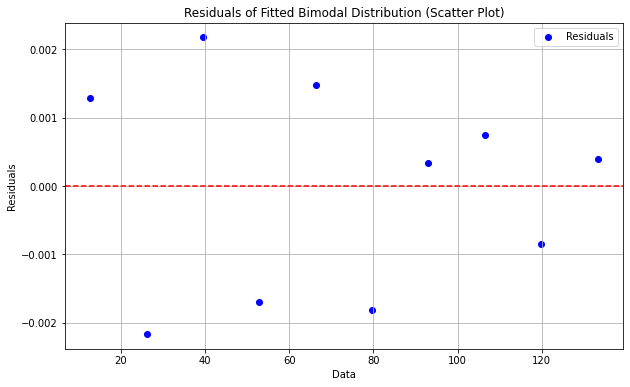

In [6]:
# Step 5: Calculate the fitted histogram values
fitted_values = bimodal_gaussian(bin_centers, *popt)

# Step 6: Calculate the residuals
residuals = hist_values - fitted_values

# Plot the residuals as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(bin_centers, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Data')
plt.ylabel('Residuals')
plt.title('Residuals of Fitted Bimodal Distribution (Scatter Plot)')
plt.legend()
plt.grid(True)
# plt.show()